# CV PROJECT1_PART **B**

#### DOMAIN:

Botanical Research


#### CONTEXT: 

University X is currently undergoing some research involving understanding the characteristics of flowers. They already have 
have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.

#### DATA DESCRIPTION: 

The dataset comprises of images from 17 plant species.

#### PROJECT OBJECTIVE: 

To experiment with various approaches to train an image classifier to predict type of flower from the image.

## 1. Import and Understand the data

In [ ]:
#Import necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from glob import glob
import cv2
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
!pip install tflearn 

#Install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=dbd2b06d9d15f04649ddb75d5cfa760bc89eb913516dfa05156bcd8b95d40b0d
  Stored in directory: /root/.cache/pip/wheels/4a/d5/f8/9585b4a100c0fd73da204ee785457d67c85e1b9050f009a849
Successfully built tflearn


### 1.A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading

In [3]:
import tflearn.datasets.oxflower17 as oxflower17

# Load the dataset
X, Y = oxflower17.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


### 1.B. Print Number of images and shape of the images

In [4]:
# Print the number and shape of images
print("Number of images:", len(X))
print("Shape of images:", X[0].shape)

Number of images: 1360
Shape of images: (224, 224, 3)


### 1.C. Print count of each class from y

In [5]:
# Print the count of each class from Y (labels)

from collections import Counter
print("Count of each class:", Counter(Y))

Count of each class: Counter({0: 80, 10: 80, 6: 80, 3: 80, 13: 80, 9: 80, 16: 80, 14: 80, 2: 80, 8: 80, 1: 80, 11: 80, 4: 80, 12: 80, 15: 80, 5: 80, 7: 80})


In [6]:
Y1 = set(Y)

In [7]:
print('Target classifications are', Y1)

Target classifications are {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


# 2. Image Exploration & Transformation 

### 2.A. Display 5 random images

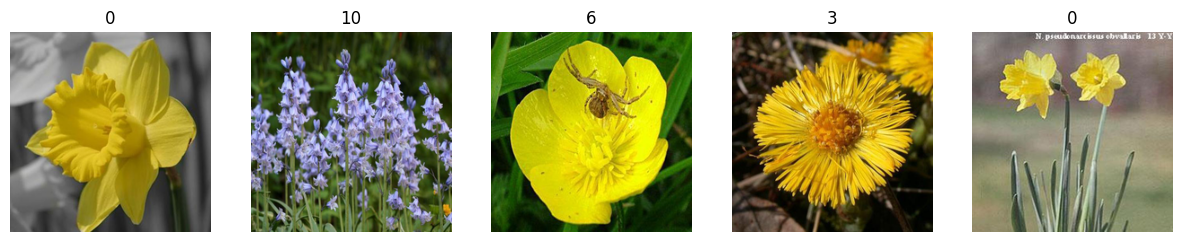

In [8]:
# Load 5 sample images
images = X

# Define the figure and subplot layout
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Loop over each subplot and display the corresponding image
for i, ax in enumerate(axes):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title(Y[i])

# Show the plot
plt.show()

### 2.B. Select any image from the dataset and assign it to a variable

In [9]:
#Select an image from the dataset
img_id = 1
image1 = X[img_id]

### 2.C. Transform the image into grayscale format and display the same.

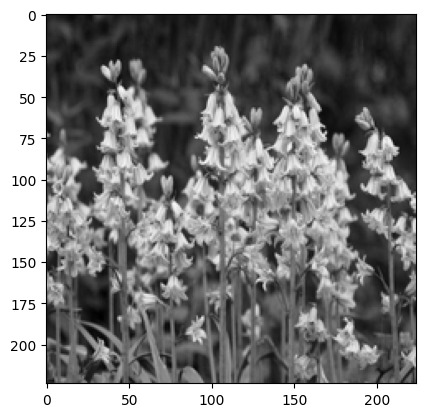

In [10]:
# Transform the image into grayscale
gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

### 2.D. Apply a filter to sharpen the image and display the image before and after sharpening

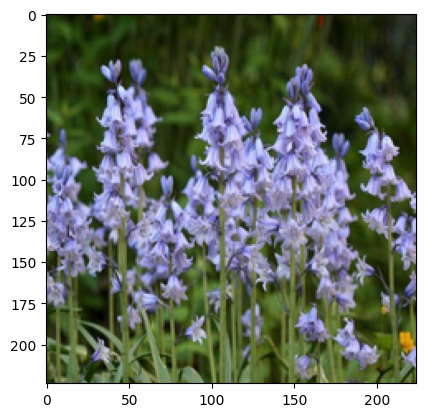

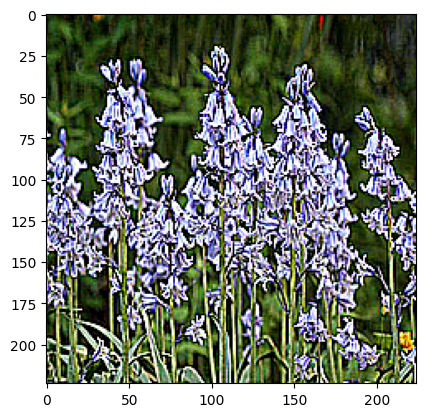

In [11]:
# Display origial image
plt.imshow(image1)
plt.show()

# Display sharpened image
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(image1, -1, sharpen_kernel)
plt.imshow(sharpened)

### 2.E. Apply a filter to blur the image and display the image before and after blur.

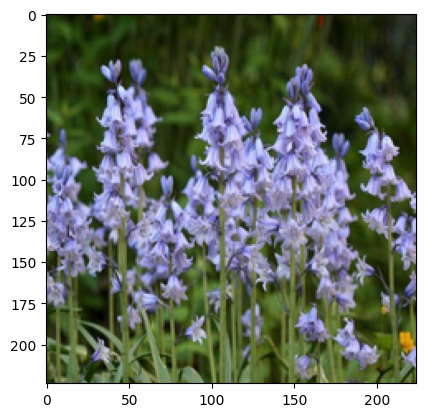

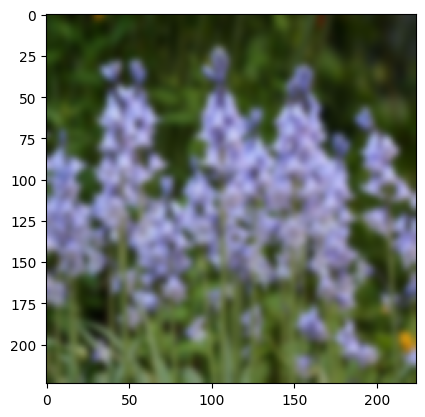

In [12]:
# Display origial image
plt.imshow(image1)
plt.show()

# Display blurred image
blurred = cv2.GaussianBlur(image1, (11, 11), 0)
plt.imshow(blurred)

### 2.F. Display all the 4 images from above questions besides each other to observe the difference

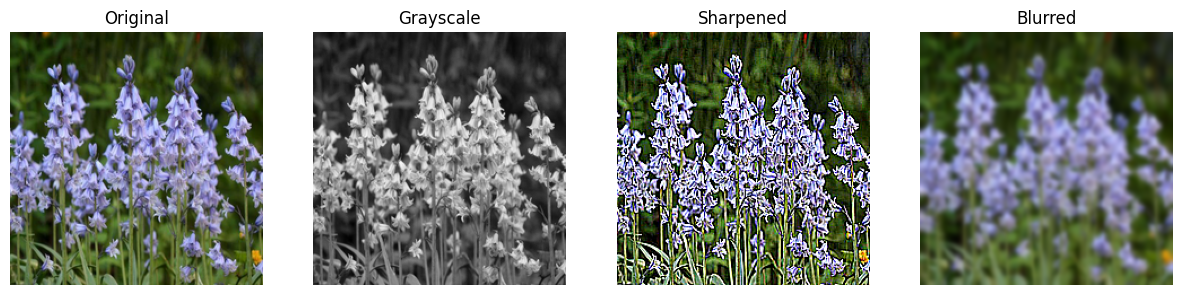

In [13]:
# Display original, grayscale, sharpened, and blurred images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(image1)
axes[0].set_title("Original")
axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Grayscale")
axes[2].imshow(sharpened)
axes[2].set_title("Sharpened")
axes[3].imshow(blurred)
axes[3].set_title("Blurred")
for ax in axes:
    ax.axis('off')
plt.show()

# 3. Model training and Tuning:

### 3.A. Split the data into train and test with 80:20 proportion. 

In [14]:
from sklearn.linear_model import LogisticRegression

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 3.B. Train a model using any Supervised Learning algorithm and share performance metrics on test data

In [15]:
# Train a logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train.reshape(X_train.shape[0], -1), Y_train)

LogisticRegression(random_state=42)

In [16]:
# Predict the classes
Y_pred = lr.predict(X_test.reshape(X_test.shape[0], -1)) #'-1' used for auto detect the features

In [17]:
# Evaluation metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
print(f"Logistic Regression Metrics:\nAccuracy: {round(accuracy,2)}\nPrecision: {round(precision,2)}\nRecall: {round(recall,2)}")

Logistic Regression Metrics:
Accuracy: 0.5
Precision: 0.53
Recall: 0.5


In [18]:
print ('Classification Report : ')
print (classification_report(Y_pred, Y_test))

Classification Report : 
              precision    recall  f1-score   support

           0       0.30      0.23      0.26        13
           1       0.20      0.18      0.19        17
           2       0.76      0.84      0.80        19
           3       0.33      0.50      0.40        12
           4       0.46      0.55      0.50        11
           5       0.41      0.37      0.39        19
           6       0.47      0.39      0.43        23
           7       0.41      0.50      0.45        14
           8       0.71      0.57      0.63        21
           9       0.60      0.47      0.53        19
          10       0.29      0.36      0.32        11
          11       0.35      0.75      0.48         8
          12       0.80      0.57      0.67        14
          13       0.50      0.89      0.64         9
          14       0.28      0.24      0.26        21
          15       0.59      0.48      0.53        21
          16       1.00      0.90      0.95        20

 

confusion_matrix


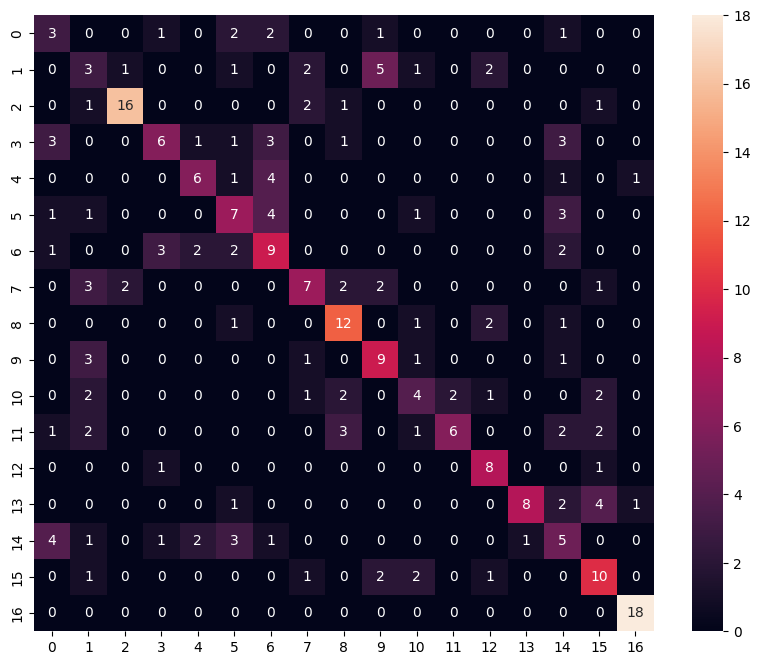

In [19]:
cm = confusion_matrix(Y_test, Y_pred)
print("confusion_matrix")
plt.figure(figsize = (10,8))
sns.heatmap(cm, annot=True);

### 3.C. Train a model using Neural Network and share performance metrics on test data

In [20]:
# Reshape the input data

X_train1 = np.reshape(X_train, (X_train.shape[0], 224*224*3))
X_test1 = np.reshape(X_test, (X_test.shape[0], 224*224*3))

In [21]:
X_train1.shape

(1088, 150528)

In [22]:
X_train1 = X_train1/255
X_test1 = X_test1/255

# Normalizing the image

In [23]:
from keras.utils import to_categorical

# Convert integer targets to binary matrices
Y_train1 = to_categorical(Y_train)
Y_test1 = to_categorical(Y_test)

In [24]:
X_train1.shape

(1088, 150528)

In [25]:
import random
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [26]:
#Neural Network model

model2 = Sequential()

# Add hidden & Output layers
model2.add(Dense(64, input_shape=(150528,), activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(512,activation='relu'))
model2.add(Dense(256,activation='relu'))
model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(17, activation='softmax'))

# adam optmizer with custom learning rate
opt= optimizers.Adam(0.001)

#Compile the model
model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#Fit the model
Flower1 = model2.fit(X_train1,Y_train1, validation_data=(X_test1,Y_test1),epochs=30, batch_size=16)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - 4s 3ms/sample - loss: 2.8093 - acc: 0.0634 - val_loss: 2.8300 - val_acc: 0.0478
Epoch 2/30
1088/1088 [==============================] - 1s 644us/sample - loss: 2.8348 - acc: 0.0469 - val_loss: 2.8220 - val_acc: 0.1103
Epoch 3/30
1088/1088 [==============================] - 1s 642us/sample - loss: 2.6607 - acc: 0.0956 - val_loss: 2.4969 - val_acc: 0.0993
Epoch 4/30
1088/1088 [==============================] - 1s 663us/sample - loss: 2.4274 - acc: 0.1158 - val_loss: 2.3496 - val_acc: 0.1324
Epoch 5/30
1088/1088 [==============================] - 1s 654us/sample - loss: 2.3407 - acc: 0.1425 - val_loss: 2.4053 - val_acc: 0.1103
Epoch 6/30
1088/1088 [==============================] - 1s 644us/sample - loss: 2.2897 - acc: 0.1498 - val_loss: 2.2729 - val_acc: 0.1287
Epoch 7/30
1088/1088 [==============================] - 1s 657us/sample - loss: 2.2158 - acc: 0.1618 - val_loss: 2.3729 - val_a

In [27]:
# score of test data
score = model2.evaluate(X_test1, Y_test1)
print("Loss : %.2f" %(score[0]))
print("Accuracy : %.2f" %(score[1]))

Loss : 2.33
Accuracy : 0.26


### 3.D. Train a model using a basic CNN and share performance metrics on test data.

In [28]:
# Normalize the data # Convert the values between 0 to 1.
X_train_1 = X_train/255
X_test_1 = X_test/255

In [69]:
import random
backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

In [70]:
# model architecture building
model_3 = Sequential()

model_3.add(BatchNormalization(input_shape = (224, 224, 3)))

model_3.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (224, 224, 3)))
model_3.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu')) 
model_3.add(MaxPooling2D(pool_size = 2))

model_3.add(Convolution2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model_3.add(Convolution2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = 2))

model_3.add(Flatten()) 

# fully connected layer
model_3.add(Dense(units = 32,activation = 'relu'))

# Classification layer
model_3.add(Dense(units = 17, activation = 'softmax')) 

In [71]:
# adam optmizer with learning rate = 0.001

opt1 = optimizers.Adam(0.001)

#Compile the model
model_3.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])

In [73]:
# Train the model
Flower2 = model_3.fit(X_train_1, Y_train1, epochs=50, batch_size=32, validation_data=(X_test_1, Y_test1))

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.0026 - acc: 0.9991 - val_loss: 7.5520 - val_acc: 0.4449
Epoch 2/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 7.5762 - val_acc: 0.4449
Epoch 3/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 7.6126 - val_acc: 0.4449
Epoch 4/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 7.6450 - val_acc: 0.4449
Epoch 5/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.0026 - acc: 1.0000 - val_loss: 7.6934 - val_acc: 0.4412
Epoch 6/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 7.7197 - val_acc: 0.4412
Epoch 7/50
1088/1088 [==============================] - 8s 7ms/sample - loss: 0.0025 - acc: 1.0000 - val_loss: 7.7416 - val_acc: 0.4449
E

In [74]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

history3 = model_3.fit_generator(
    datagen.flow(X_train_1, Y_train1, batch_size=32),
    steps_per_epoch=len(X_train_1) / 32,
    epochs=50,
    validation_data=(X_test_1, Y_test1))

Epoch 1/50
34/34 [==============================] - 14s 416ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.9253 - acc: 0.1958 - val_loss: 2.1374 - val_acc: 0.2610
Epoch 2/50
34/34 [==============================] - 14s 410ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.1691 - acc: 0.2702 - val_loss: 1.9702 - val_acc: 0.3125
Epoch 3/50
34/34 [==============================] - 14s 413ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.9294 - acc: 0.3364 - val_loss: 1.7558 - val_acc: 0.3897
Epoch 4/50
34/34 [==============================] - 14s 412ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.7208 - acc: 0.4072 - val_loss: 1.6271 - val_acc: 0.5037
Epoch 5/50
34/34 [==============================] - 14s 418ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.6061 - acc: 0.4550 - val_loss: 1.4682 - val_acc: 0.5294
Epoch 6/50
34/34 [==============================] - 14s 412ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.5891 - acc: 0.4476 - val_loss: 1.3660 - val_acc: 0.5441
Epoc

In [75]:
# score of test data
score = model_3.evaluate(X_test_1, Y_test1)
print("Loss : %.2f" %(score[0]))
print("Accuracy : %.2f" %(score[1]))

Loss : 1.07
Accuracy : 0.73


In [76]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 111, 111, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 111, 111, 256)     2

In [77]:
print(Flower2.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


Text(0.5, 1.0, 'Training and validation loss')

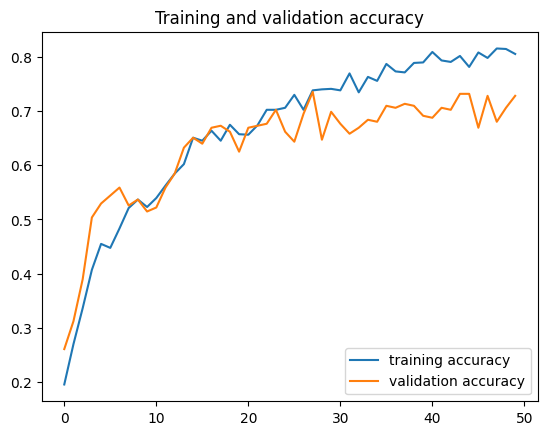

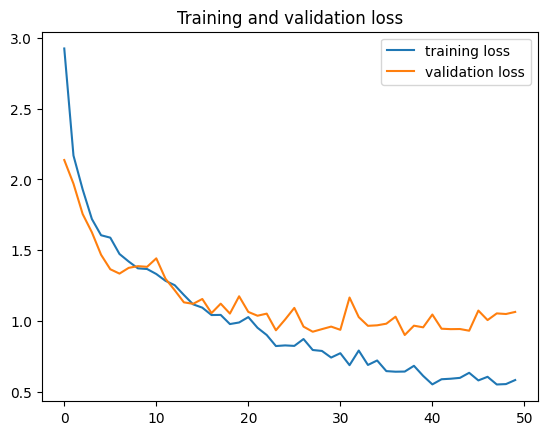

In [78]:
# Plot the training & Validation Loss & accuracy
Acc = history3.history['acc']
Val_acc  = history3.history['val_acc']
Loss     = history3.history['loss']
Val_loss = history3.history['val_loss']

epochs   = range(len(Acc)) # Get number of epochs

plt.plot  ( epochs, Acc, label = 'training accuracy' )
plt.plot  ( epochs, Val_acc, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, Loss, label = 'training loss' )
plt.plot  ( epochs, Val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

### 3.E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


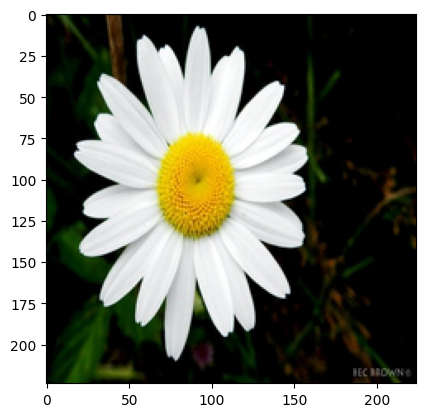

In [80]:
import matplotlib.image as mpimg
import os

image_path = '/content/drive/My Drive/CV1 datasets/Prediction.jpg'
### '/content/drive/My Drive/CV1 datasets/Prediction.jpg'

# Load image from file
img = mpimg.imread(image_path)
plt.imshow(img);

In [81]:
import cv2

# Load the image to predict
img = cv2.imread(image_path)

# Preprocess the image to match the input format of CNN model
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Pass the preprocessed image through the model using the `predict` function
predictions = model_3.predict(img)

# Interpret the model's output to determine the predicted class or classes
predicted_class = np.argmax(predictions)

# Print the predicted class
print('Predicted class:', predicted_class)

Predicted class: 13


# CV_PROJECT1_PART_B   IS    OVER